# 31. Аппроксимация данных. Логистическая функция.
[Weiner B. Discovering Psychology. 1977]

В таблице представлены средние значения количества слов , которыми владеет ребенок в заданном возрасте .

| t |  y|
|------|-----|  
| 1.0  |    3|
|1.5   |   22|
|2.0   |  272|
|2.5   |  446|
|3.0   |  896|
|3.5   | 1222|
|4.0   | 1540|
|4.5   | 1870|
|5.0   | 2072|
|6.0   | 2562|


Построить линейную $y = \beta_0 + \beta_1 x$
 и две логистические модели: $y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 t}},
\qquad
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 (t - t_0)}},$
 
 
аппроксимирующие данные.
Найти общую ошибку в каждом из этих случаев и сравнить результаты.

## Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy.optimize import curve_fit
import math

## Создание массивов заданных значений

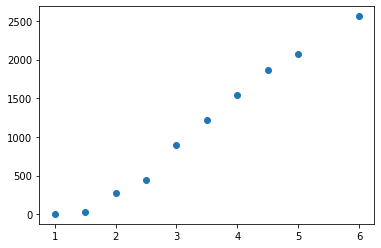

In [2]:
t = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0])
y = np.array([3, 22, 272, 446, 896, 1222, 1540, 1870, 2072, 2562])
plt.plot(t, y, 'o')
pass

### Методом наименьших квадратов находим коэффициенты $\beta_0$ и $\beta_1$

In [3]:
m = len(t)
T = np.stack((np.ones(m), t)).T
beta, residuals, rank, sv = linalg.lstsq(T,y)

In [4]:
beta0, beta1 = beta
beta0, beta1

(-763.8571428571421, 561.9264069264069)

### Строим аппроксимирующую прямую из линейной функции

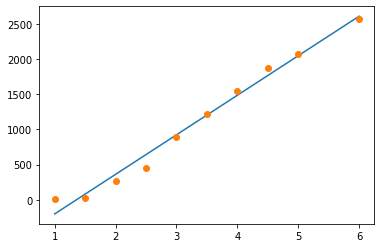

In [5]:
plt.plot(t, T@beta)
plt.plot(t, y, 'o')
pass

### Вычисляем общую ошибку найденной нами прямой

In [6]:
res = pow(y - (beta0 + beta1 * t) , 2)
res = np.sqrt(res)
err = 0
for i in range(len(res)):
    err+=res[i]
print(err)    

823.2207792207796


### Определяем первую логистическую модель


In [7]:
def LogM1(t, b1, b2) :
    return 2400 / (1 + b1 * np.exp(-b2*t))

---
#### Методом подбора я нашел коэффициент $\beta_0$ при котором кривая максимально близка к заданным значениям y
#### Если определять этот коэффициент функцией curve_fit из библиотеки scipy.optimize, то график функции принимает вид горизонтальной прямой


In [8]:
def LogM1Test(t, b0, b1, b2) :
    return b0 / (1 + b1 * np.exp(-b2*t))

C:\Users\sskam\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(1090.4999961630895, -130.688107178735, 243.47423251629675)

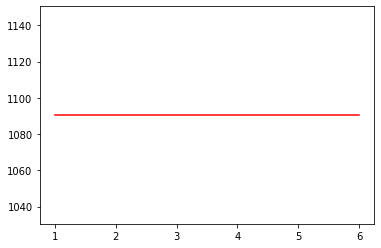

In [9]:
args, _ = curve_fit(LogM1Test, t, y)
b0, b1, b2 = args
plt.plot(t, LogM1Test(t,b0,b1,b2), color = 'red')
b0, b1, b2

---


#### Используя функцию curve_fit находим коэффициенты $\beta_1$ и $\beta_2$

In [10]:
args, _ = curve_fit(LogM1, t, y)
b1, b2 = args
yLogM1 = LogM1(t, b1, b2)

b1, b2

(136.05696163473326, 1.4002214413050171)

#### Строим график первой логистической модели с полученными коэффициентами

136.05696163473326


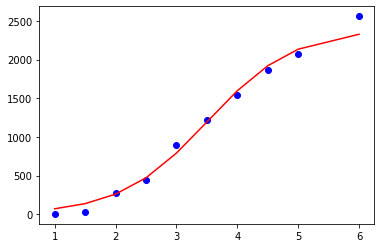

In [11]:
plt.plot(t, y, 'o', color = 'blue')
plt.plot(t, LogM1(t,b1, b2), color = 'red')
pass
print(b1)

#### Снова вычисляем общую ошибку

In [12]:
res = pow(y - LogM1(t, b1, b2), 2)
res = np.sqrt(res)
err = 0
for i in range(len(res)):
    err+=res[i]
print(err)    

757.4349949724544


#### Производим аналогичные действия со второй логистической моделью:
- Определяем функцию
- Находим недостающие коэффициенты с помощью функции curve_fit
- Выводим график модели и находим общую ошибку


In [13]:
def LogM2(t, t0, b1, b2):
    return 2400 / (1 + b1 * np.exp(-b2 * (t - t0)))

In [14]:
zn, _ = curve_fit(LogM2, t, y)
t0, b1, b2 = zn
yLogM2 = LogM2(t, t0, b1, b2)
t0, b1, b2

(2.6536998048486145, 3.3111895298696807, 1.4002325281545083)

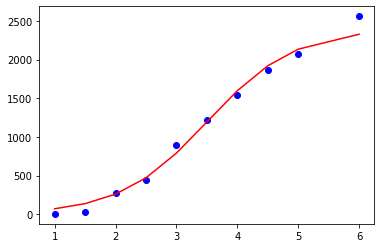

In [15]:
plt.plot(t, y, 'o', color = 'blue')
plt.plot(t, LogM2(t, t0, b1, b2), color = 'red')
pass

In [16]:
res = pow(y - LogM2(t, t0, b1, b2), 2)
res = np.sqrt(res)
err = 0
for i in range(len(res)):
    err+=res[i]
print(err )  

757.4445086385354


### Сравнивая общие ошибки трех функций я пришел к выводу:
- что функция curve_fit сильнее аппроксимизирует данные, чем линейный МНК
- у двух логистических моделей, между собой практически нет разницы в ошибках, что еще раз доказывает, что curve_fit лучше справляется с аппроксимизацией данных